## PRML 4.1.7 The perceptron algorithm

###Overview
Figure 4.7 is illustration of the convergance of the perceptron learning algorithm, showing data points from two classes in a two-dimensional feature space($\phi_1, \phi_2$).The top left plot shows the initial parameter vector ${\bf w}$ shown as a black arrow together with the corresponding decision boundary and the bottom right plot for which all data points are correctly classified.

###Procedure

①The formula of hyperplane is (4.52).

\begin{equation*}
  y({\bf x}) = f ({\bf x}^{\bf T} \phi({\bf x}))  (4.52)
\end{equation*}

②Weight vector $w$ which minimize error function (4.54) is seeked with the stochastic gradient descent algorithm (4.55) until all data is classfied appropreately.

\begin{equation*}
  E_p({\bf w}) = -\sum_{n=1}^N {\bf w}^{\bf T} \phi({\bf x}_n){\bf t}_n  (4.54)
\end{equation*}

\begin{equation*}
{\bf w}^{\rm \tau+1} = {\bf w}^{\rm \tau} - \mu \nabla  E_p({\bf{w}}) = {\bf w}^{\rm \tau}-  \mu \phi({\bf x}_n) {\bf t}_n   (4.55)
\end{equation*}

In [1]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import random
%matplotlib inline

In [2]:
def func(train_data, k):
    def perceptron(train_data, k):
        x = 0
        w = array([1.0,1.0, 1.0])
        eta = 0.1
        converged = False
    
        while not converged:
            x += 1
            if x == k:
                converged = True
                
            for i in range(N):
                w_t_phi_x = np.dot(w, [1,train_data[i,0], train_data[i,1]])
                
                if w_t_phi_x > 0:
                    d = 1
                else:
                    d = 2
             
                if d == train_data[i,2]:
                    continue
                else:
                    if d == 1:
                        t = 1
                        w += -eta * array([1, train_data[i,0], train_data[i,1]]) * t
                    else:
                        t = -1
                        w += -eta * array([1, train_data[i,0], train_data[i,1]]) * t
        return w
    
    w = perceptron(train_data, k)

    #Plot
    plt.scatter(x_red,y_red,color='r',marker='x')
    plt.scatter(x_blue,y_blue,color='b',marker='x')
    x_line = linspace(-1.0, 1.0, 1000)
    y_line = -w[1]/w[2] * x_line - w[0]/w[2]
    plt.plot(x_line, y_line, 'k')
    xlim(-1.0, 1.0)
    ylim(-1.0, 1.0)
    title("Figure 4.7")
    show()

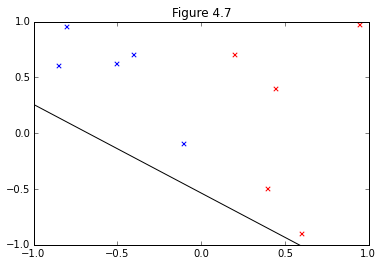

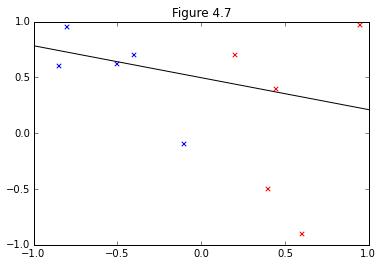

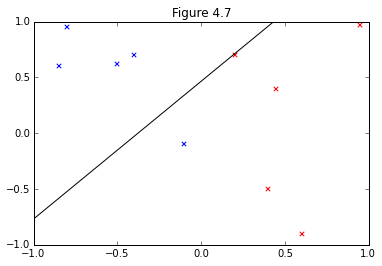

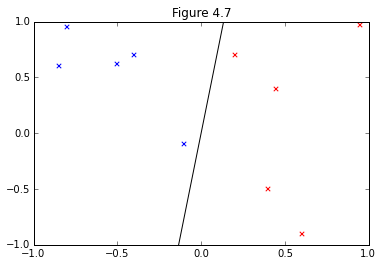

In [3]:
if __name__ == "__main__":
    #Generate sumple data
    #Mean
    mu_blue = [-0.5,0.3]
    mu_red = [0.5,-0.3]
    #Covariance
    cov = [[0.08,0.06], [0.06,0.08]]

    #Data Blue
    x_blue = [-0.85, -0.8, -0.5, -0.4, -0.1]
    y_blue = [0.6,0.95, 0.62, 0.7, -0.1]
    blue_label = np.ones(5)

    #Data Red
    x_red = [0.2, 0.4, 0.45, 0.6, 0.95]
    y_red = [0.7, -0.5, 0.4, -0.9, 0.97]
    red_label = np.ones(5)*2

    Data_blue = vstack((x_blue, y_blue, blue_label)).T
    Data_red = vstack((x_red, y_red, red_label)).T
    Data_marge = vstack((Data_blue,Data_red))
    
    N = len(Data_marge)
    for k in (N-9, N-6, N-3, N):
        func(Data_marge, k)

###References

Christopher Bishop. (2007). Pattern Recognition and Machine Learning (Information Science and Statistics). Springer